In [1]:
import tensorflow as tf
import numpy as np


In [11]:
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a,fmt='jpeg'):
    """Display an array of counts as a 
    colorful picture of a fractal"""
    a_cyclic = (6.028*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
                         30+50*np.sin(a_cyclic),
                         155-80*np.cos(a_cyclic)],2)
    img[a==a.max()]=0
    a=img
    a=np.uint8(np.clip(a,0,255))
    f=BytesIO()
    PIL.Image.fromarray(a).save(f,fmt)
    display(Image(data=f.getvalue()))
    
sess = tf.InteractiveSession()

C:\Users\rahil\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


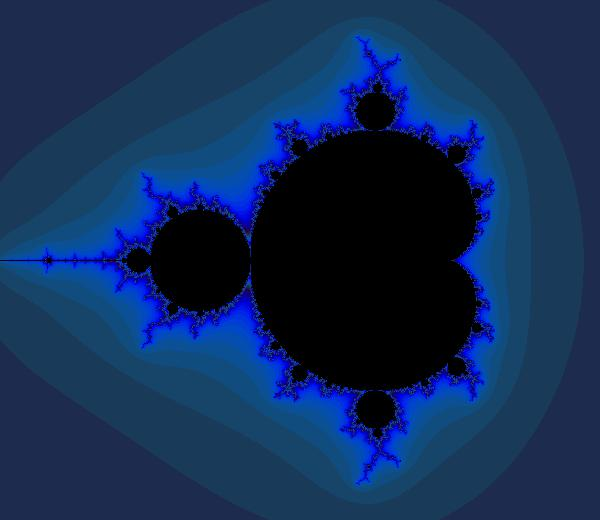

In [12]:
Y,X=np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z=X+1j*Y
xs=tf.constant(Z.astype(np.complex64))
zs=tf.Variable(xs)
ns=tf.Variable(tf.zeros_like(xs,tf.float32))
tf.global_variables_initializer().run()
zs_ = zs*zs + xs
not_diverged = tf.abs(zs_)<4

step=tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged,tf.float32))
    )
for i in range(200): step.run()
DisplayFractal(ns.eval())


In [18]:
matrix1 = tf.constant([[3.,3.]])
matrix2=tf.constant([[2.],[2.]])
product=tf.matmul(matrix1,matrix2)
with tf.Session() as sess:
    results = sess.run([product])
    print(results)

Tensor("Const_15:0", shape=(1, 2), dtype=float32)
[array([[ 12.]], dtype=float32)]


In [19]:
x=tf.Variable([1.0, 2.0])
a=tf.constant([3.0, 3.0])
x.initializer.run()
sub = tf.subtract(x, a)
print(sub.eval())


[-2. -1.]


In [24]:
sess=tf.InteractiveSession()
sess.run(x.assign([4.0,6.0]))
print(sub.eval())
sess.close()

[ 1.  3.]


C:\Users\rahil\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
